<a href="https://colab.research.google.com/github/JsNcAr/Metodos1_JasonArias_AngieRicaurte/blob/ramaALRR/Lanzamiento_de_la_bala_Ejercicio_4_interpolacion_Lagrange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import urllib.request
from operator import length_hint
import sympy as sym

In [2]:
url = "https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Parabolico.csv"
filename = "Posiciones.csv"
urllib.request.urlretrieve(url, filename)
data = np.loadtxt(filename, dtype=float, skiprows=1, delimiter=",")


In [3]:
X = data[:, 0]
Y = data[:, 1]


In [4]:
def Lagrange(x, xi, j):

    prod = 1.0
    n = len(xi)

    for i in range(n):
        if i != j:
            prod *= (x - xi[i]) / (xi[j] - xi[i])

    return prod


def Interpolate(x, xi, yi):

    Sum = 0.
    n = len(xi)

    for j in range(n):
        Sum += yi[j] * Lagrange(x, xi, j)

    return Sum

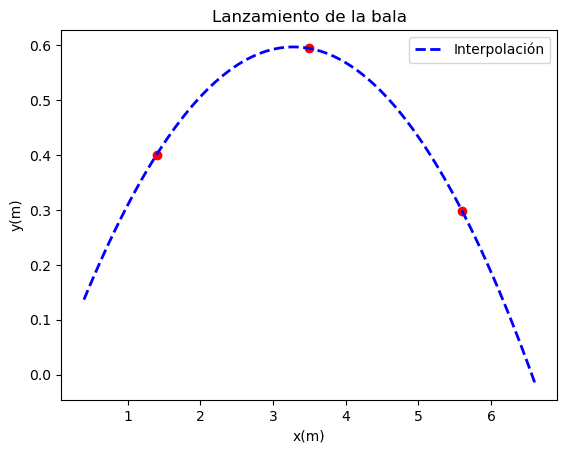

In [5]:
x = np.linspace(X[0] - 1, X[-1] + 1, 100)
y = Interpolate(x, X, Y)

for i in range(len(X)):
    plt.scatter(X[i], Y[i], c="red")
plt.plot(x, y, c="blue", label="Interpolación", linewidth=2, linestyle="--")
plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.title("Lanzamiento de la bala")
plt.legend()
plt.show()

In [6]:
x_inicial = x[0]
y_inicial = y[0]

x = sym.Symbol('x', real=True)

f = Interpolate(x, X, Y)
f = sym.simplify(f)
f


x*(0.363970234266202 - 0.0554912422401579*x)

Si ahora comparamos la función resultante de la interpolación con la ecuación de trayectoria de la bala, nos podemos dar cuenta de ciertas similitudes en los coeficientes:

$$ y = \tan(θ)x-\frac{gx^2}{2v^2cos(θ)^2}$$

Así, vemos que tan(θ) es 0.364, lo cual coincide con el resultado de tan(20°), por tanto, θ es 20. Luego,a partir de esa relación podemos obtener la velocidad de la siguiente manera:

$$ −0.0555x^2 = -\frac{gx^2}{2v^2cos(θ)^2} $$

$$ v= \sqrt{\frac{g}{(0.0555*2*cos(θ)^2)}} $$



In [7]:
velocidad = np.sqrt(9.8 / (0.0555 * 2 * (np.cos(np.pi / 9)**2)))
print(f'La velocidad inicial es: {round(velocidad,3)} m/s')

La velocidad inicial es: 9.999 m/s
